In [1]:
import pandas as pd

In [2]:
code_redi_df = pd.read_csv("dataset/Code_Red_I.csv")
slammer_df = pd.read_csv("dataset/Slammer.csv")
nimda_df = pd.read_csv("dataset/Nimda.csv")

In [3]:
nimda_df.shape

(10048, 42)

### Combining the dataset

In [4]:
dataset1 = pd.concat([slammer_df,nimda_df])


### Upscaling Minority class for Balanced dataset

In [5]:
from sklearn.utils import resample

In [6]:
df_minority = dataset1[dataset1.Label==1]
df_majority = dataset1[dataset1.Label==-1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples = 12882, random_state=1)

#### Combining majority and up-scaled minority to create a balanced dataset

In [7]:
dataset1 = pd.concat([df_minority_upsampled, df_majority])
print(dataset1.shape)
dataset1.reset_index(drop=True)

(25764, 42)


,Hour and Minutes,Hour,Minutes,Seconds,Number of announcements,Number of withdrawals,Number of announced NLRI prefixes,Number of withdrawn NLRI prefixes,Average AS-path length,Maximum AS-path length,...,Maximum AS-path length11,Maximum AS-path length12,Maximum AS-path length13,Maximum AS-path length14,Maximum AS-path length15,Number of Interior Gateway Protocol (IGP) packets,Number of Exterior Gateway Protocol (EGP) packets,Number of incomplete packets,Packet size (B),Label
0,926,9,26,3,489,7,1761,358,6,16,...,0,0,0,0,1,449,0,40,302,1
1,1726,17,26,4,57,6,97,19,6,10,...,0,0,0,0,0,43,0,14,228,1
2,1355,13,55,5,277,8,802,52,6,15,...,0,0,0,1,0,256,0,21,266,1
3,2053,20,53,3,54,7,206,198,6,10,...,0,0,0,0,0,41,1,12,354,1
4,2305,23,5,7,90,6,266,35,7,22,...,0,0,0,0,0,76,0,14,265,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25759,2355,23,55,12,41,5,202,31,5,10,...,0,0,0,0,0,40,0,1,303,-1
25760,2356,23,56,5,31,3,286,5,6,7,...,0,0,0,0,0,31,0,0,348,-1
25761,2357,23,57,0,44,6,96,42,6,8,...,0,0,0,0,0,41,0,3,247,-1
25762,2358,23,58,4,65,4,170,24,6,9,...,0,0,0,0,0,58,0,7,255,-1


In [8]:

X_train1 = dataset1.drop(dataset1.columns[[0,1,2,3,41]], axis=1)
Y_train1 = dataset1.iloc[:,41]
Y_train1 = [0 if ele>0 else 1 for ele in Y_train1]
Y_train1 = pd.Series(Y_train1)
X_test1 = code_redi_df.drop(code_redi_df.columns[[0,1,2,3,41]], axis=1)
Y_test1 = code_redi_df.iloc[:,41]
Y_test1 = [0 if ele>0 else 1 for ele in Y_test1]
Y_test1 = pd.Series(Y_test1)

In [9]:
X_train1.iloc[:,0]
Y_train1
# X_train1.reset_index(drop=True)

0        0
1        0
2        0
3        0
4        0
        ..
25759    1
25760    1
25761    1
25762    1
25763    1
Length: 25764, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig

Text(0.5, 1, 'Correlation Matrix for all 37 features')

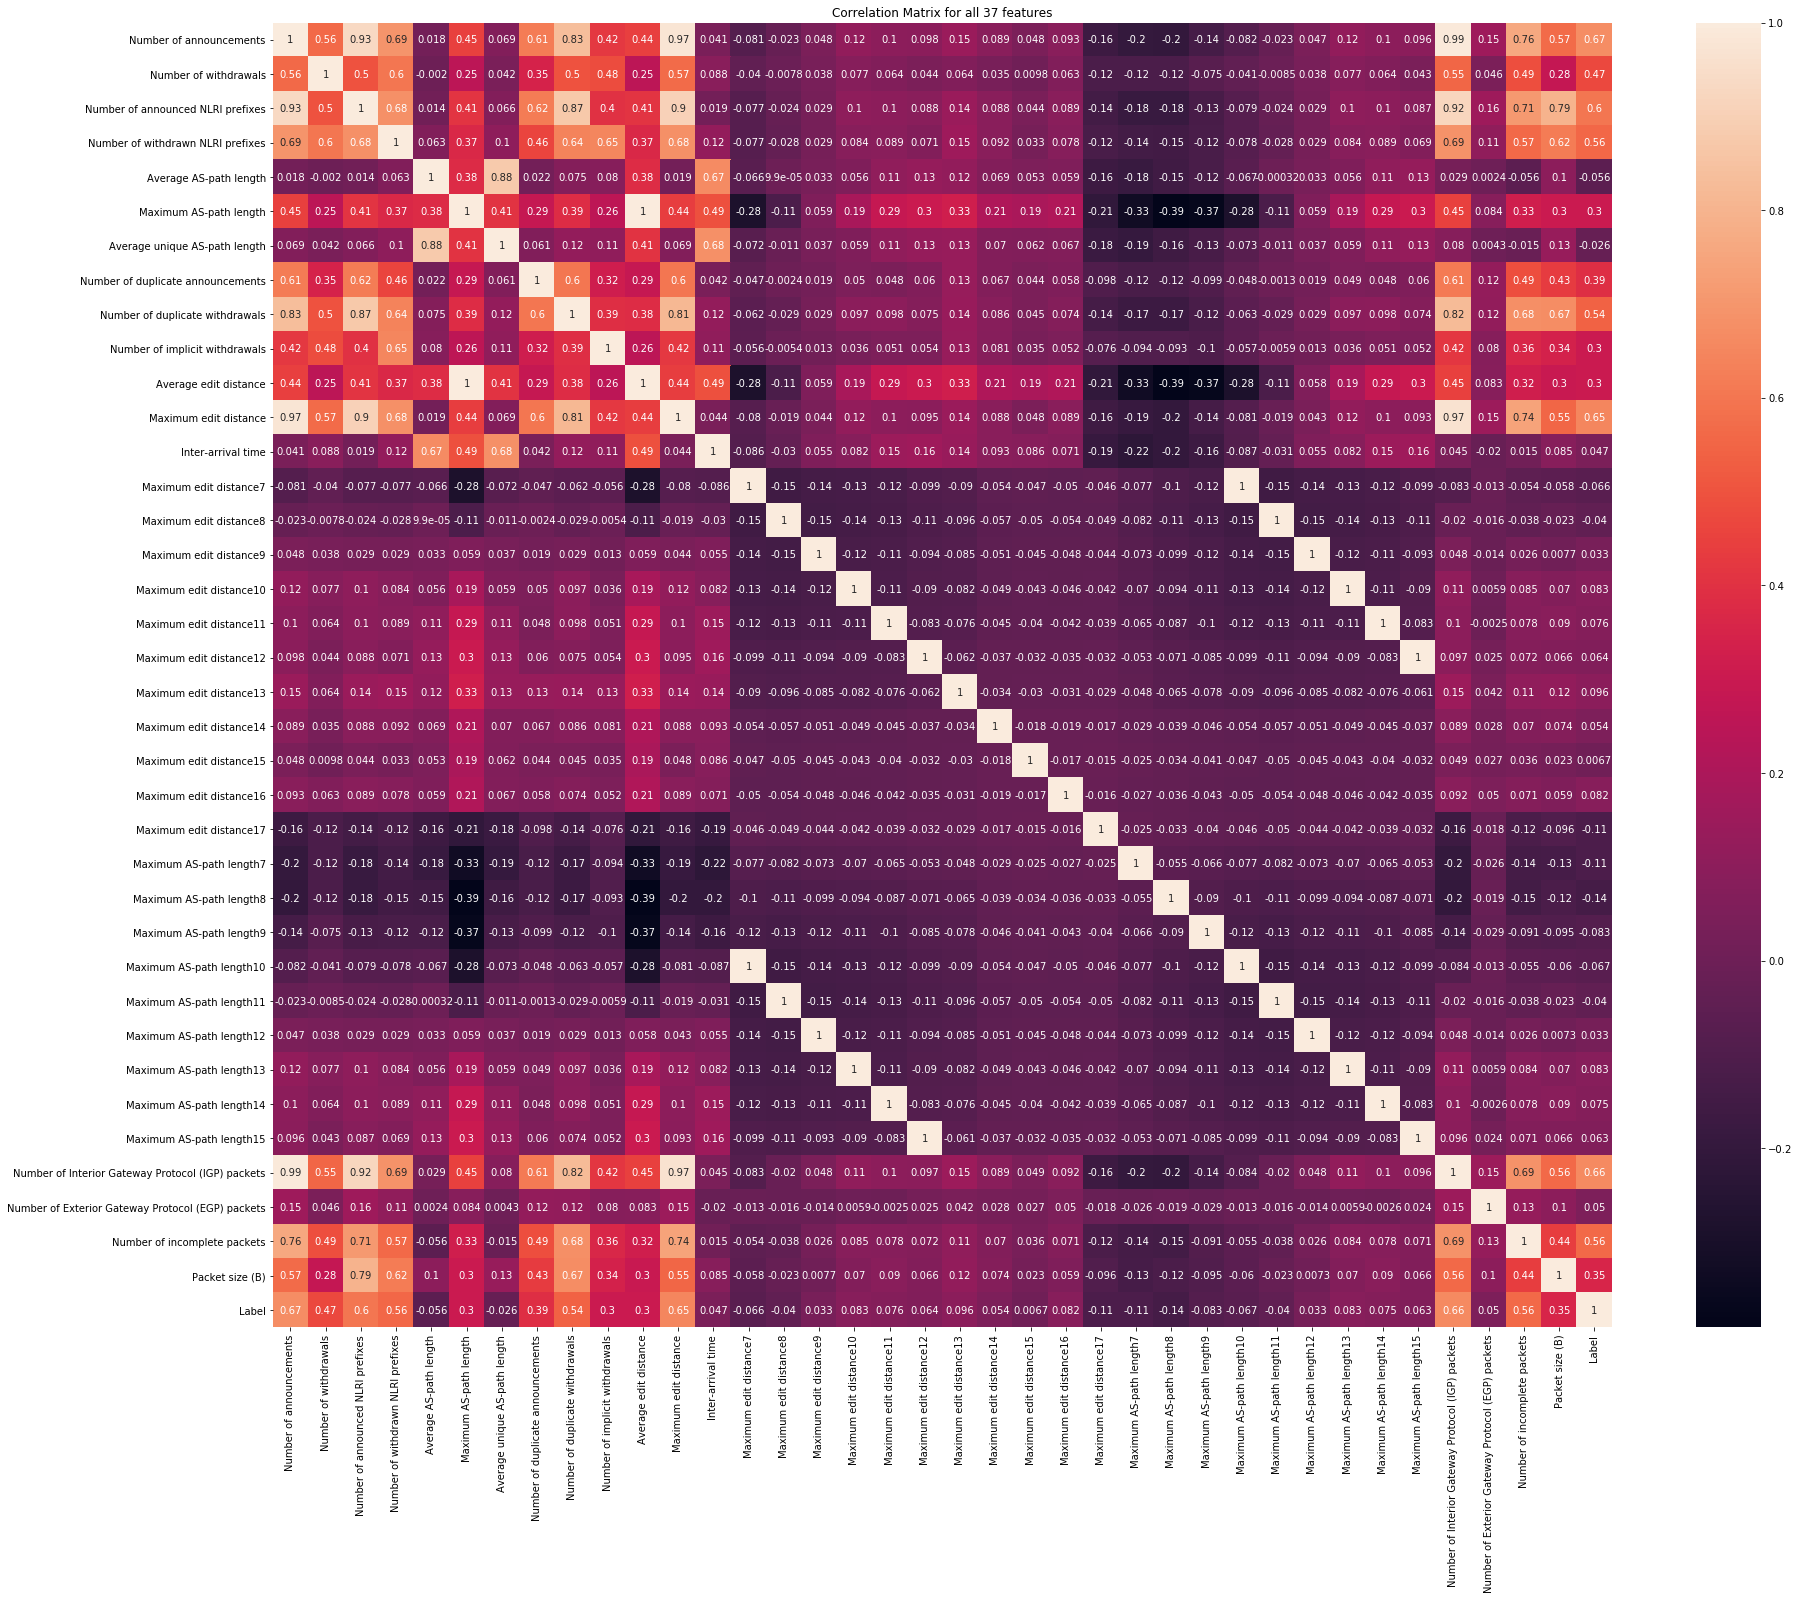

In [11]:
plt.figure(figsize=(30,24))
sns_plot = sns.heatmap(dataset1.iloc[:,4:42].corr(method='spearman'), annot=True)
fig = sns_plot.get_figure()
fig.savefig("heatmap_corr_spearman.png")
# plt.savefig("Heat_map.png")
plt.title("Correlation Matrix for all 37 features")

### Normalizing and data cleaning

In [12]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train1)
X_train = pd.DataFrame(data=X_train_norm, columns = X_train1.columns)
X_test_norm = sc.fit_transform(X_test1)
X_test = pd.DataFrame(data=X_test_norm, columns = X_test1.columns)

In [14]:
X_train.shape

(25764, 37)

### Splitting into training and testing

In [15]:
# from sklearn.model_selection import train_test_split

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

### Re-run for important features 1

In [49]:
removed_features = [21,29,30,31,32]
X_train_sf = X_train.drop(X_train.columns[removed_features], axis=1)
X_test_sf = X_test.drop(X_test.columns[removed_features], axis=1)

### Re-run for Top 5 features

In [75]:
X_train_sf = X_train.iloc[:,[5,7,8,9,10]]
X_test_sf = X_test.iloc[:,[5,7,8,9,10]]

In [76]:
X_train_sf.shape

(25764, 5)

In [79]:
X_train.shape

(25764, 5)

In [78]:
X_train = X_train_sf
X_test = X_test_sf

### Using Support Vector Machine

In [17]:
from sklearn import svm

In [21]:
quad_svm_clf = svm.SVC(kernel="poly", degree=2, probability=True)

In [29]:
linear_svm_clf = svm.SVC(kernel="linear", probability=True)

In [30]:
rbf_svm_clf = svm.SVC(kernel="rbf")

In [31]:
cubic_svm_clf = svm.SVC(kernel="poly", degree=3, probability=True)

In [80]:
y_score = quad_svm_clf.fit(X_train, Y_train1).decision_function(X_test)

In [81]:
y_score_linear = linear_svm_clf.fit(X_train, Y_train1).decision_function(X_test)

In [82]:
y_score_rbf = rbf_svm_clf.fit(X_train, Y_train1).decision_function(X_test)

In [83]:
y_score_cubic = cubic_svm_clf.fit(X_train, Y_train1).decision_function(X_test)

In [84]:
from sklearn.metrics import roc_auc_score
svm_auc = roc_auc_score(Y_test1, y_score)

In [85]:
svm_auc_linear = roc_auc_score(Y_test1, y_score_linear)

In [86]:
svm_auc_rbf = roc_auc_score(Y_test1, y_score_rbf)

In [87]:
svm_auc_cubic = roc_auc_score(Y_test1, y_score_cubic)

In [88]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test1, y_score)
linear_fpr, linear_tpr, _ = roc_curve(Y_test1, y_score_linear)
rbf_fpr, rbf_tpr, _ = roc_curve(Y_test1, y_score_rbf)
cubic_fpr, cubic_tpr, _ = roc_curve(Y_test1, y_score_cubic)


In [ ]:
# y_pred = svm_clf.predict(X_test)

In [ ]:
# y_pred = (y_pred>0.5)

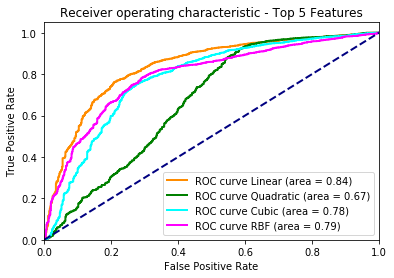

In [89]:
plt.figure()
lw = 2

plt.plot(linear_fpr, linear_tpr, color='darkorange',
         lw=lw, label='ROC curve Linear (area = %0.2f)' % svm_auc_linear)
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve Quadratic (area = %0.2f)' % svm_auc)
plt.plot(cubic_fpr, cubic_tpr, color='cyan',
         lw=lw, label='ROC curve Cubic (area = %0.2f)' % svm_auc_cubic)
plt.plot(rbf_fpr, rbf_tpr, color='magenta',
         lw=lw, label='ROC curve RBF (area = %0.2f)' % svm_auc_rbf)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Top 5 Features')
plt.legend(loc="lower right")
plt.savefig("top_features_roc.png")
plt.show()


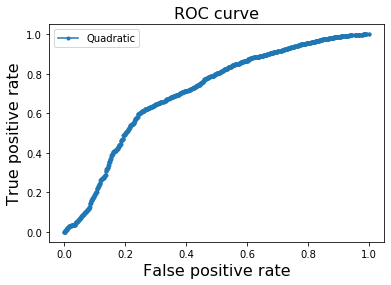

In [27]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test1, y_score)
# lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
plt.figure()
# plt.plot([0, 1], [0, 1], 'k–')
plt.plot(fpr, tpr, marker='.', label="Quadratic")
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.title('ROC curve', fontsize = 16)
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
acc = metrics.accuracy_score(Y_test1, y_pred)
recall = recall_score(Y_test1,y_pred)
print(recall)
precision = precision_score(Y_test1, y_pred, average='binary')
precision

In [ ]:
np.count_nonzero(y_pred==-1)

In [ ]:
acc

In [ ]:
Y_test1[Y_test1==-1].count()
Y_test1[Y_test1==1].count()


In [ ]:
acc

#### With selected important features

In [ ]:
removed_features = [21,29,30,31,32]
X_train_sf = X_train.drop(X_train.columns[removed_features], axis=1)
X_test_sf = X_test.drop(X_test.columns[removed_features], axis=1)

In [ ]:
X_train_sf = X_train.iloc[:,[5,7,8,9,10]]
X_test_sf = X_test.iloc[:,[5,7,8,9,10]]

In [ ]:
X_train_sf.shape

In [ ]:
svm_clf_sf = svm.SVC(kernel="poly", degree=2)

In [ ]:
svm_clf_sf.fit(X_train_sf, Y_train1)

In [ ]:
y_pred_sf = svm_clf_sf.predict(X_test_sf)

In [ ]:
acc_sf = metrics.accuracy_score(y_pred_sf, Y_test1)

In [ ]:
acc_sf

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(Y_test1, y_pred_sf)
f1

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset

# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X_train1, Y_train1)
X_selected = pd.DataFrame(data=X_selected, columns=X_train1.columns)
print(X_selected.shape)


In [ ]:
svm_clf_sf = svm.SVC(kernel="rbf")

In [ ]:
svm_clf_sf.fit(X_train_sf, y_train)

In [ ]:
y_pred_sf = svm_clf_sf.predict(X_test_sf)

In [ ]:
acc_sf = metrics.accuracy_score(y_pred_sf, y_test)

In [ ]:
acc_sf